In [1]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
os.getcwd()

'C:\\Users\\guspo\\Augustin\\X\\4A\\Cours\\HMC\\poisson_network_models\\src\\smc_2324_project\\experimental_results'

In [2]:
#scp -r augustin.poissonnier@france.polytechnique.fr:./poisson_network_models/src/smc_2324_project/experiments/k_value ./
#scp -r augustin.poissonnier@autriche.polytechnique.fr:poisson_network_models/src/smc_2324_project/experiments/k_value/ ./

# Posterior

In [9]:
def est_nom_fichier_valide(nom_fichier, n, letter):
    return nom_fichier.startswith('posterior_'+letter+'_' + str(n) ) and nom_fichier.endswith('.json')

def recup_data(dossier, letter, values):
    donnees_json = []
    for n in values:
        donnees_json.append([])
        for nom_fichier in os.listdir(dossier):
            chemin_fichier = os.path.join(dossier, nom_fichier)
            if os.path.isfile(chemin_fichier) and est_nom_fichier_valide(nom_fichier, n, letter):
                # Lire le fichier JSON
                with open(chemin_fichier, 'r') as fichier:
                    donnees = json.load(fichier)
                    donnees_json[-1]+=donnees      
    groupe=[]
    valeur=[]
    for i in range(len(values)):
        groupe+=[values[i]]*len(donnees_json[i])
        valeur+=donnees_json[i]
    # Créez un DataFrame exemple
    donnees = {
        'Groupe': groupe,
        'Valeur': valeur
    }            
    return donnees

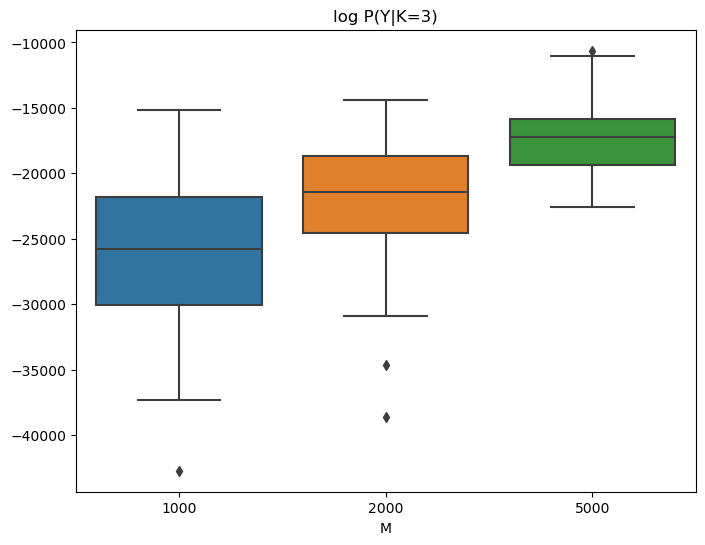

In [10]:
donnees=recup_data('./posterior_for_diff_M', 'M', [1000,2000,5000])
df = pd.DataFrame(donnees)

plt.figure(figsize=(8, 6))
sns.boxplot(x='Groupe', y='Valeur', data=df)
plt.title('log P(Y|K=3)')
plt.xlabel('M')
plt.ylabel('')
plt.show()

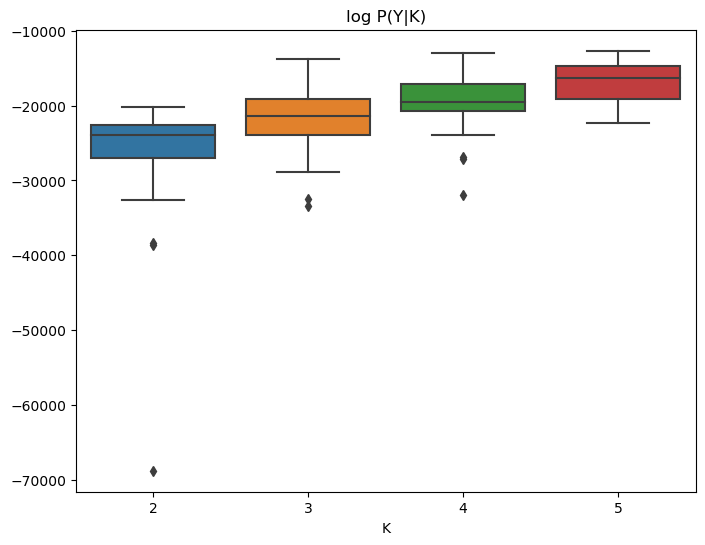

In [12]:
donnees=recup_data('./posterior_for_diff_k', 'k', [2,3,4,5])
df = pd.DataFrame(donnees)


plt.figure(figsize=(8, 6))
sns.boxplot(x='Groupe', y='Valeur', data=df)
plt.title('log P(Y|K)')
plt.xlabel('K')
plt.ylabel('')
plt.show()